In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

     |████████████████████████████████| 1.5MB 9.4MB/s 


In [ ]:
df = pd.read_excel('/content/gdrive/My Drive/Sample/daily.xlsx', index_col='arrival_date',parse_dates=True)
df.index.freq='D'

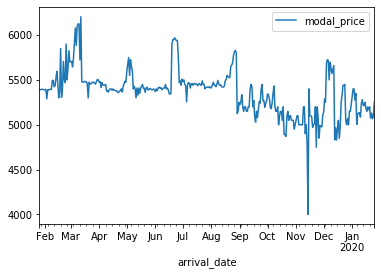

In [ ]:
df.plot()

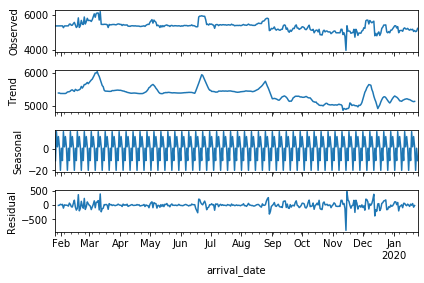

In [ ]:
result = seasonal_decompose(df['modal_price'],model='add')
result.plot();

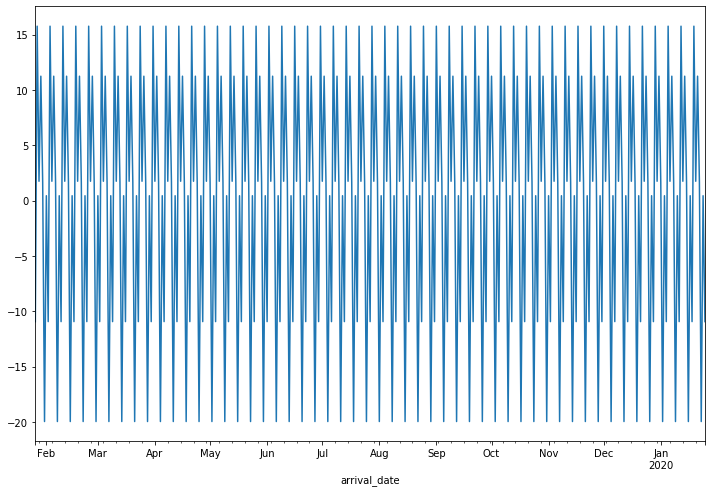

In [ ]:
result.seasonal.plot(figsize=(12,8))

In [ ]:
auto_arima(df['modal_price'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  365
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -2333.630
Date:                            Fri, 24 Jan 2020   AIC                           4675.261
Time:                                    01:36:09   BIC                           4690.850
Sample:                                         0   HQIC                          4681.457
                                            - 365                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4086      5.588     -0.073      0.942     -11.360      10.543
ma.L1         -0.4047      0.025    -16.493      0.000      -0.453      -0.357
ma.S.L12       0.0825      0.053      1.548      0.122      -0.022       0.187
sigma2      2.167e+04    702.038     30.863      0.000    2.03e+04     2.3e+04
===================================================================================
Ljung-Box (Q):                       51.19   Jarque-Bera (JB):              3224.37
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               2.33   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
len(df)

365

In [ ]:
train = df.iloc[:355]
test = df.iloc[355:]

In [ ]:
model = SARIMAX(train['modal_price'],order=(0, 1, 1),seasonal_order=(0, 0, 1, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        modal_price   No. Observations:                  355
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -2273.238
Date:                            Fri, 24 Jan 2020   AIC                           4552.475
Time:                                    01:43:11   BIC                           4564.083
Sample:                                01-26-2019   HQIC                          4557.094
                                     - 01-15-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4029      0.022    -17.996      0.000      -0.447      -0.359
ma.S.L12       0.0864      0.055      1.580      0.114      -0.021       0.194
sigma2      2.212e+04    692.698     31.928      0.000    2.08e+04    2.35e+04
===================================================================================
Ljung-Box (Q):                       50.34   Jarque-Bera (JB):              3050.69
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               2.34   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start,end,typ='levels').rename('Predictions')

In [ ]:
predictions

2020-01-16    5228.183557
2020-01-17    5234.613144
2020-01-18    5207.151617
2020-01-19    5218.064717
2020-01-20    5217.888578
2020-01-21    5218.911092
2020-01-22    5213.601472
2020-01-23    5226.873796
2020-01-24    5229.743696
2020-01-25    5223.961006
Freq: D, Name: Predictions, dtype: float64

In [ ]:
test

,state,district,market,modal_price
arrival_date,,,,
2020-01-16,Punjab,Patiala,Patiala,5180
2020-01-17,Punjab,Patiala,Patiala,5150
2020-01-18,Punjab,Patiala,Patiala,5200
2020-01-19,Punjab,Patiala,Patiala,5170
2020-01-20,Punjab,Patiala,Patiala,5200
2020-01-21,Punjab,Patiala,Patiala,5075
2020-01-22,Punjab,Patiala,Patiala,5130
2020-01-23,Punjab,Patiala,Patiala,5067
2020-01-24,Punjab,Patiala,Patiala,5091


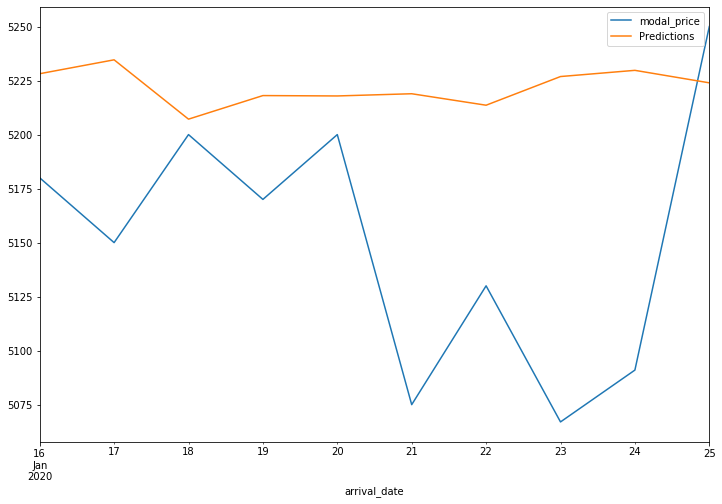

In [ ]:
test['modal_price'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test['modal_price'],predictions)
error

92.38478480177119

In [ ]:
test['modal_price'].mean()

5151.3

In [ ]:
predictions.mean()

5221.8992674488845

In [ ]:
model = SARIMAX(df['modal_price'],order=(0, 1, 1),seasonal_order=(0, 0, 1, 12))
results = model.fit()

In [ ]:
fcast = results.predict(len(df),len(df)+15,typ='levels').rename('SARIMA FORECAST')

In [ ]:
fcast

2020-01-26    5183.469642
2020-01-27    5186.839807
2020-01-28    5181.827340
2020-01-29    5178.843010
2020-01-30    5185.144137
2020-01-31    5181.808199
2020-02-01    5184.296767
2020-02-02    5173.897072
2020-02-03    5178.853531
2020-02-04    5172.604000
2020-02-05    5174.357939
2020-02-06    5187.941396
2020-02-07    5182.543814
2020-02-08    5182.543814
2020-02-09    5182.543814
2020-02-10    5182.543814
Freq: D, Name: SARIMA FORECAST, dtype: float64

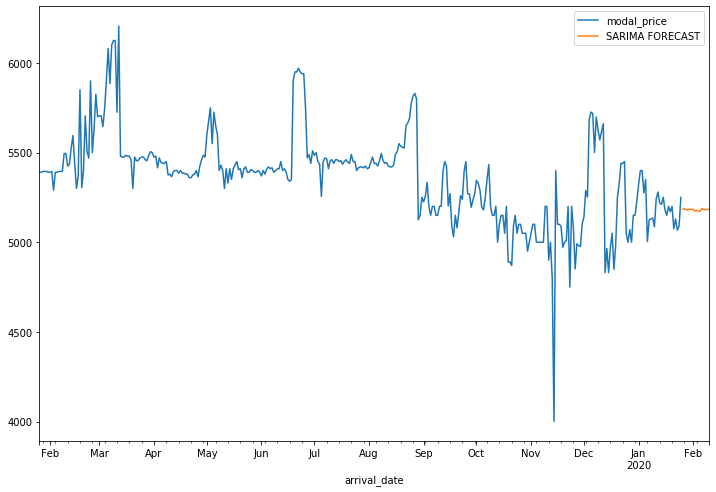

In [ ]:
df['modal_price'].plot(legend=True,figsize=(12,8))
fcast.plot(legend='True')

In [ ]:
from pandas import DataFrame
export_csv = fcast.to_csv ('/content/gdrive/My Drive/Output/export.csv', index = None, header=True)